# Методы Оптимизации. Даниил Меркулов. Введение в численные методы.

## Структура работы в семестре
### Система оценивания
![](grade.png)
Полученный рейтинг дает лишь ориентир для выставления итоговой оценки за семестр. Я оставляю за собой право изменять эту оценку в произвольном диапазоне на свое усмотрение. 
Все новости курса по-прежнему, публикуются в [телеграм канале](https://t.me/mipt_optimization)

### Важный момент:
Теперь сдача домашнего задания будет происходить через платформу [stepik.org](https://stepik.org/course/5770/syllabus). Большая часть заданий будет проверяться в автоматическом режиме (готовьтесь к кодерским таскам).
![](coder.jpg)

## Примерный план
|    | Дата  |                                                     Тема                                                     |
|:--:|-------|:------------------------------------------------------------------------------------------------------------:|
|  1 | 6.02  | Введение. Классификация задач оптимизации. Классификация скорости сходимости методов. Одномерная минимизация |
|  2 | 13.02 |                                               Градиентный спуск                                              |
|  3 | 20.02 |                                    Метод Ньютона. Квазиньютоновские методы                                   |
| 4  | 27.02 | Метод сопряженных градиентов                                                                                 |
| 5  | 13.03 | Симплекс метод решения ЛП                                                                                    |
| 6  | 20.03 | Методы внутренней точки 1                                                                                    |
| 7  | 27.03 | Метод проекции градиента и условного градиента                                                               |
| 8  | 3.04  | Методы внутренней точки 2                                                                                    |
| 9  | 10.04 | Метод модифицированой функции Лагранжа и внешних штрафов                                                     |
| 10 | 17.04 | Метод наименьших квадратов                                                                                   |
| 11 | 24.04 | Стохастические методы оптимизации                                                                            |
| 12 | 1.05  | Прикладной curve fitting                                                                                     |
| 13 | 8.05  | Dynamic Programming                                                                                          |
| 14 | 15.05 | Integer Linear Programming                                                                                   |

## Численные методы. Зачем нужны и откуда взялись?
### Общая постановка
Решаем общую задачу математического программирования:

$$
\begin{split}
& \min_{x \in \mathbb{R}^n} f(x)\\
\text{s.t. }  g_i(x) \leq& 0, \; i = 1,\ldots,m\\
 h_j(x) =& 0, \; j = 1,\ldots,k\\
\end{split}
$$

### Теоретические результаты
* Необходимое условие первого порядка: если $x^*$ точка локального минимума дифференцируемой функции $f(x)$, тогда
$$
f′(x^*)=0
$$
* Необходимое условие второго порядка: если $x^*$ точка локального минимума дважды дифференцируемой функции $f(x)$, тогда
$$
f′(x^*)=0, \qquad \qquad\qquad f′′(x^*) \succeq 0,
$$
* Достаточное условие: пусть $f(x)$ дважды дифференцируемая выпуклая функция, и пусть точка $x^*$ удовлетворяет условиям
$$
f′(x^*)=0, \qquad\qquad\qquad f′′(x^*) \succeq 0,
$$
тогда $x^*$ является точкой строго локального минимума функции $f(x)$.
* Условия Каруша Куна Таккера позволяют решать задачи математического программирования аналитически. 

### Основные проблемы:
* Сформулировать задачу оптимизации в классической форме - де-факто труднейшая часть задачи в реальном мире
* Решать ККТ может быть практически нецелесообразно

## Итерационные методы
### Итеративная природа решения
Как правило, методы генерируют бесконечную последовательность приближенных решений
$$
\{x_t\},
$$
которая за конечное число шагов (а лучше - время) сходится к оптимальному (хотя бы одному из оптимальных) решению $x^*$.
![](iterative.png)

При этом на каждом шаге метод как бы "спрашивает" информацию о локальном поведении функции (её значение в точке $x_t$, градиент, гессиан и т.д.), что позволяет ввести понятие "оракула", как абстрактного устройства, которое отвечает на некоторые вопросы метода. Эта концепция создана для облегчения понимания и формализации происходящего. В то же время, стоит понимать, что внутри черного ящика, выдающего ответы (оракула), как правило, заложен алгоритм вычисления значения функции (её производной или пр.), который так же занимает какое то время

### Общая схема
Дано: начальное приближение $x$, требуемая точность $\varepsilon$.

```python
def GeneralScheme(x, epsilon):
    while StopCriterion(x) > epsilon:
        OracleResponse = RequestOracle(x)
        UpdateInformation(I, x, OracleResponse)
        x = NextPoint(I, x)
    return x
```

## Проблемы
### Критерий остановки
* Сходимость по аргументу: 
$$
\| x_k - x^*  \|_2 < \varepsilon
$$ 
* Сходимость по функционалу: 
$$
\| f_k - f^* \|_2 < \varepsilon
$$ 
* Выполнение необходимого условия для дифференцируемой функции 
$$
\| f'(x_k) \|_2 < \varepsilon
$$

Но ведь $x^*$ и $f^* = f(x^*)$ неизвестны!

Супер лайфхак
$$
\|x_{k+1} - x_k \| = \|x_{k+1} - x_k + x^* - x^* \| \leq \|x_{k+1} - x^* \| + \| x_k - x^* \| \leq 2\varepsilon
$$

**Замечание**: лучше использовать относительные изменения этих величин! Например $\dfrac{\|x_{k+1} - x_k \|_2}{\| x_k \|_2}$


### Локальная природа поведения методов
![](globallocal.png)

## Классификация задач
### Условная и безусловная
* Безусловная задача оптимизации 
$$
\min_{x \in \mathbb{R}^n} f(x)
$$
Далее на функцию $f(x)$ накладываются ограничения (линейность, непрерывность, липшициевость, выпуклость, унимодальность, и т.д.). Несмотря на то, что в реальной жизни они встречаются существенно реже, их изучение очень важно с точки зрения строительных блоков для решения условных задач.
* Условная задача 

    Содержит хотя бы одно равенство или неравенство вдобавок к вышенаписанному. Такие задачи сложнее, но гораздо чаще встречаются в реальной жизни

### Линейная и нелинейная
Если все функции, указанные в общей постановке - линейные - мы имеем дело с задачей линейного программирования или с задачей линейной оптимизации. Заметим, что люди научились сражаться с задачами линейного программирования (в следующих сериях). Поэтому особый интерес представляют задачи нелинейной оптимизации.

### Выпуклая и невыпуклая
Общая задача математического программирования называется выпуклой, если функции $f(x)$ и $g_i, i = 1, \ldots, m$ выпуклы, в то время как $h_j$, если есть, линейны.
Для выпуклых задач разработаны методы, обладающие хорошей вычислительной сложностью, приемлимым числом итераций для достижения гарантированной точности даже в общем случае. Выпуклая оптимизация, в целом, шагнула сильно дальше общей теории нелинейной оптимизации с точки зрения практических результатов. Однако, нельзя ограничиться только ими, так как в жизни полно невыпуклых задач.

## Классификация методов

### По типу оракула
* Методы нулевого порядка: оракул возвращает только значение функции $f(x)$
* Методы первого порядка: оракул возвращает значение функции $f(x)$ и её градиент $f'(x)$
* Методы второго порядка: оракул возвращает значение функции $f(x)$, её градиент $f'(x)$ и гессиан $f''(x)$.

### По скорости сходимости

* Сублинейная
$$
\| x_{k+1} - x^* \|_2 \leq C k^{\alpha},
$$
где $\alpha < 0$ и $ 0 < C < \infty$

* Линейная
$$
\| x_{k+1} - x^* \|_2 \leq Cq^k \qquad\qquad\qquad \text{или} \qquad\qquad\qquad \| x_{k+1} - x^* \|_2 \leq C\| x_k - x^* \|_2
$$
где $q \in (0, 1)$ и $ 0 < C < \infty$

* Сверхлинейная 
$$
\| x_{k+1} - x^* \|_2 \leq Cq^{k^2} \qquad\qquad\qquad \text{или} \qquad\qquad\qquad \| x_{k+1} - x^* \|_2 \leq C_k\| x_k - x^* \|_2
$$
где $q \in (0, 1)$ и $ 0 < C_k < \infty$, $C_k \to 0$

* Квадратичная
$$
\| x_{k+1} - x^* \|_2 \leq C q^{2^k} \qquad\qquad\qquad \text{или} \qquad\qquad\qquad \| x_{k+1} - x^* \|_2 \leq C\| x_k - x^* \|^2_2
$$
где $q \in (0, 1)$ и $ 0 < C < \infty$

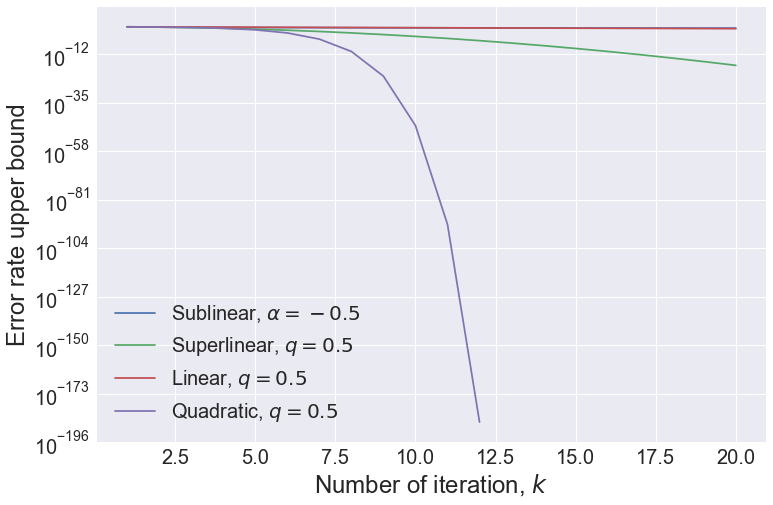

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np

C = 10
alpha = -0.5
q = 0.9
num_iter = 20
sublinear = np.array([C * k**alpha for k in range(1, num_iter + 1)])
linear = np.array([C * q**k for k in range(1, num_iter + 1)])
superlinear = np.array([C * q**(k**2) for k in range(1, num_iter + 1)])
quadratic = np.array([C * q**(2**k) for k in range(1, num_iter + 1)])
plt.figure(figsize=(12,8))
plt.semilogy(np.arange(1, num_iter+1), sublinear, 
             label=r"Sublinear, $\alpha = -0.5$")
plt.semilogy(np.arange(1, num_iter+1), superlinear, 
             label=r"Superlinear, $q = 0.5$")
plt.semilogy(np.arange(1, num_iter+1), linear, 
             label=r"Linear, $q = 0.5$")
plt.semilogy(np.arange(1, num_iter+1), quadratic, 
             label=r"Quadratic, $q = 0.5$")
plt.xlabel("Number of iteration, $k$", fontsize=24)
plt.ylabel("Error rate upper bound", fontsize=24)
plt.legend(loc="best", fontsize=20)
plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)

In [2]:
# Stylish cell, better to compile at the beginning
from IPython.html.services.config import ConfigManager
from IPython.utils.path import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
cm.update('livereveal', {
              'fontsize': 4,
              'theme': 'simple_cyr',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
              'height': '724',
              'scroll': True,
              'slideNumber': True
})


from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: locate_profile has moved to the IPython.paths module since IPython 4.0.
  after removing the cwd from sys.path.
